     X1    X2  Y
0 -0.25 -0.14  1
1 -0.30  0.02  1
2  0.71 -0.31  1
3 -0.50 -0.82  1
4  0.17  0.19  1
(718, 3)


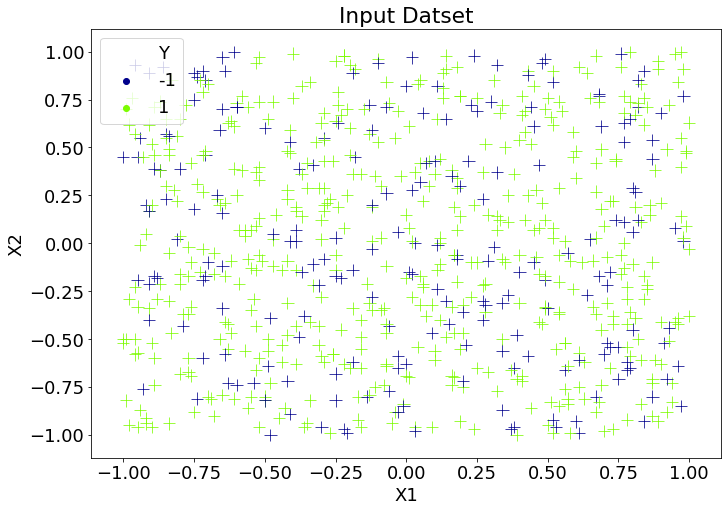

In [232]:
#importing all necessary packages and definning parameter value:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
plt.rcParams['figure.figsize'] = (10.0,7.0)
plt.rcParams['figure.constrained_layout.use']= True
plt.rc('font',size=18)

#plot_the_import_dataset_Wee2.csv and rename the column values.
df = pd.read_csv('Dataset_2.csv',header = None,skiprows =1)
df.columns=['X1','X2','Y']
#check data are imported correctly or not
print(df.head())
print(df.shape)
#plot the graph
plt.title('Input Datset')
sbn.scatterplot(x='X1',y='X2', hue='Y', s=150, palette =['darkblue','lawngreen'], marker='+', data=df)
plt.show()

In [221]:
#Assign each column Values:
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]


The executed polynomial is 1
Score
[0.7089201877934272]
The executed polynomial is 2
Score
[0.7089201877934272]
The executed polynomial is 3
Score
[0.7075117370892019]
The executed polynomial is 4
Score
[0.7116784037558685]
The executed polynomial is 5


C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score
[0.711697965571205]
The executed polynomial is 6


C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", 

Score
[0.7103090766823161]
The executed polynomial is 7


C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", 

Score
[0.7117175273865415]
Mean error [1.1644910644910644, 1.1644910644910644, 1.1626392126392127, 1.1603146853146855, 1.157808857808858, 1.1570642320642321, 1.154945054945055]
Std error [0.0647347508438222, 0.0647347508438222, 0.06330941706462496, 0.0618021233521095, 0.06286404470241606, 0.06397840511371346, 0.06644422937571812]


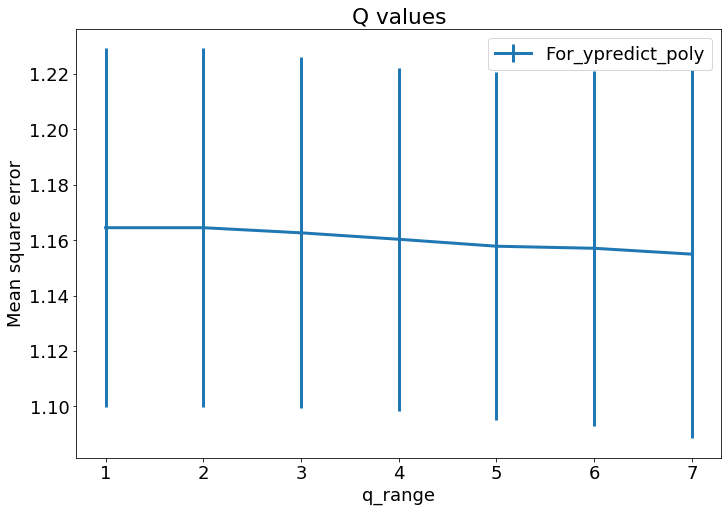

In [233]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mean_error=[]; std_error=[];
mean_q=[]; std_error_q=[];
q_range = [1,2,3,4,5,6,7]
for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    Ci_range = [0.01, 0.1, 1, 5,6,7]
    print('The executed polynomial is {}'.format(q))
    for Ci in Ci_range:
        scores=[];
        model= LogisticRegression(C=Ci, solver='lbfgs')
        scores.append(cross_val_score(model, Xpoly, y, cv=5, scoring='accuracy').mean())
        temp=[]; 
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            temp.append(mean_squared_error(y[test],ypred))
    print('Score')
    print(scores)
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    mean_q.append(np.array(mean_error).mean()) 
    std_error_q.append(np.array(std_error).mean())
print('Mean error {}'.format (mean_q))
print('Std error {}'.format(std_error_q))
plt.errorbar(q_range,mean_q,yerr=std_error_q,linewidth=3)
plt.legend(["For_ypredict_poly"])
plt.xlabel('q_range')
plt.title('Q values')
plt.ylabel('Mean square error')
plt.show()

Scores [0.7089201877934272, 0.7089201877934272, 0.7089201877934272, 0.711697965571205, 0.7102895148669797, 0.7102895148669797, 0.7116784037558685, 0.7116784037558685, 0.7116784037558685]


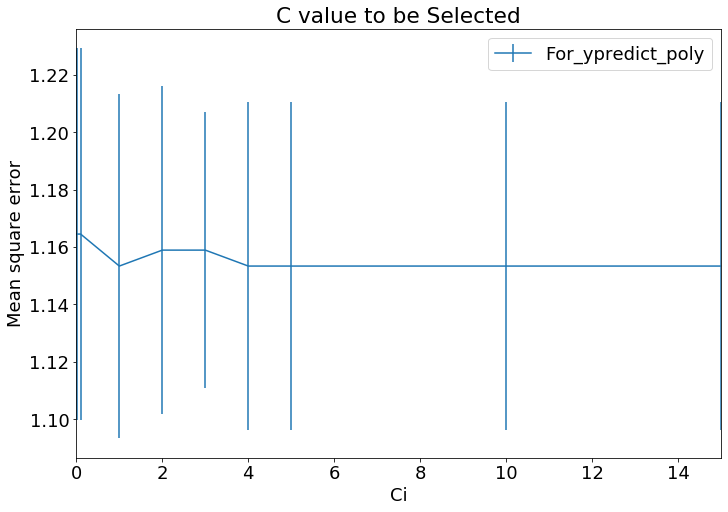

In [234]:
#polynomial feature of 1 is choosen.
#adding features to the dataset using polynomial feature function.
from sklearn.preprocessing import PolynomialFeatures
Xpoly_4 = PolynomialFeatures(4).fit_transform(X)
#train and test for polynomial = 4 to find best fit c value in logistic regression.
mean_error_4=[]; std_error_4=[]; scores_4=[];
Ci_range = [0.01, 0.1, 1,2,3,4, 5, 10, 15]
for Ci in Ci_range:
    temp_4=[]
    model_4 = LogisticRegression(C=Ci, solver='lbfgs')
    scores_4.append(cross_val_score(model_4, Xpoly_4, y, cv=5, scoring='accuracy').mean())
    kf = KFold(n_splits=5)
    for train, test in kf.split(Xpoly_4):
        model_4.fit(Xpoly_4[train], y[train])
        ypred_4 = model_4.predict(Xpoly_4[test])
        temp_4.append(mean_squared_error(y[test],ypred_4))
    mean_error_4.append(np.array(temp_4).mean())
    std_error_4.append(np.array(temp_4).std())
print('Scores {}'.format(scores_4))
plt.errorbar(Ci_range,mean_error_4,yerr=std_error_4)
plt.legend(["For_ypredict_poly"])
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.title('C value to be Selected')
plt.xlim((0,15))
plt.show()

(718,)
0.7103064066852368


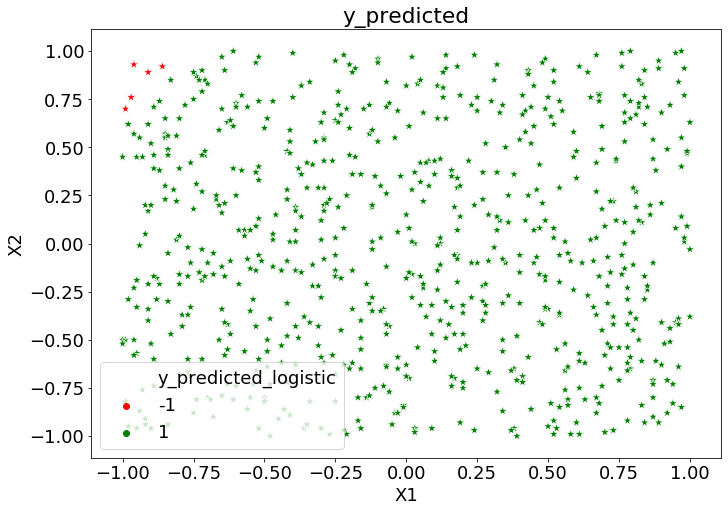

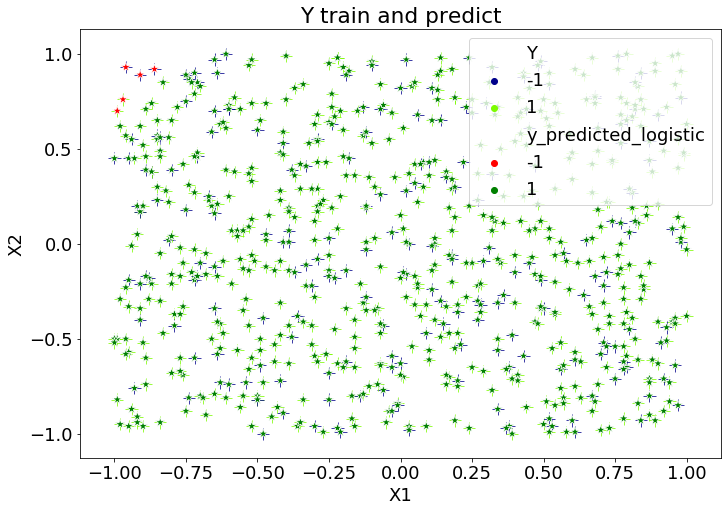

In [235]:
# the optimal solution found out is Polynomial max value of 6 and c value of 3
scores_true=[];    
model_true= LogisticRegression(penalty='l2',C=3,solver='lbfgs')
scores_true = (cross_val_score(model_true, Xpoly_4, y, cv=5, scoring='accuracy').mean())
model_true.fit(Xpoly_4, y)
ypred_true=model_true.predict(Xpoly_4)
print(ypred_true.shape)
df['y_predicted_logistic']=ypred_true
print(model_true.score(Xpoly_4, y))
#plot the graph predicted y for logistic regression.
sbn.scatterplot(x='X1',y='X2', hue='y_predicted_logistic',palette=['r','g'],marker='*',s=100, data=df)
plt.title('y_predicted')
plt.show()
#both y and y predicted.
sbn.scatterplot(x='X1',y='X2', hue='Y', s=150, palette =['darkblue','lawngreen'], marker='+', data=df)
sbn.scatterplot(x='X1',y='X2', hue='y_predicted_logistic',palette=['r','g'],marker='*',s=100, data=df)
plt.title('Y train and predict')
plt.show()


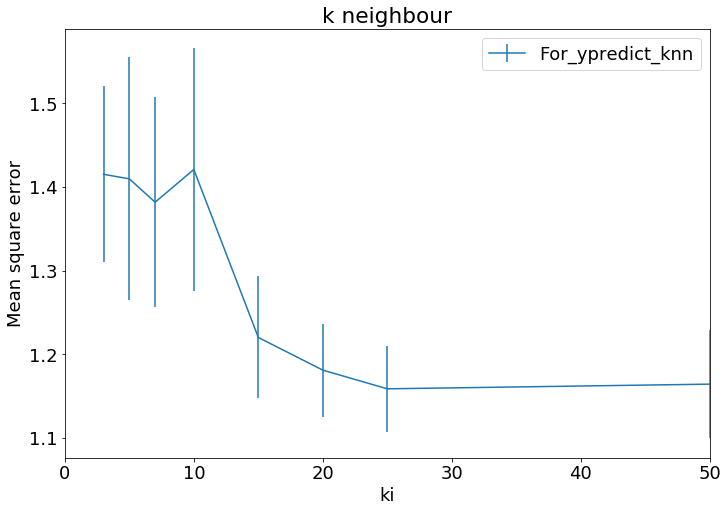

In [236]:
#Implementing Knn model
mean_error_knn=[]; std_error_knn=[]; scores_knn=[];
ki_range = [3,5,7,10,15,20,25,50,75]
for ki in ki_range:
    temp_knn=[]
    model_knn = KNeighborsClassifier(n_neighbors=ki,weights='uniform') 
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model_knn.fit(X[train], y[train])
        ypred_knn = model_knn.predict(X[test])
        temp_knn.append(mean_squared_error(y[test],ypred_knn))
    mean_error_knn.append(np.array(temp_knn).mean())
    std_error_knn.append(np.array(temp_knn).std())
plt.errorbar(ki_range,mean_error_knn,yerr=std_error_knn)
plt.legend(["For_ypredict_knn"])
plt.xlabel('ki'); plt.ylabel('Mean square error')
plt.title('k neighbour')
plt.xlim((0,50))
plt.show()

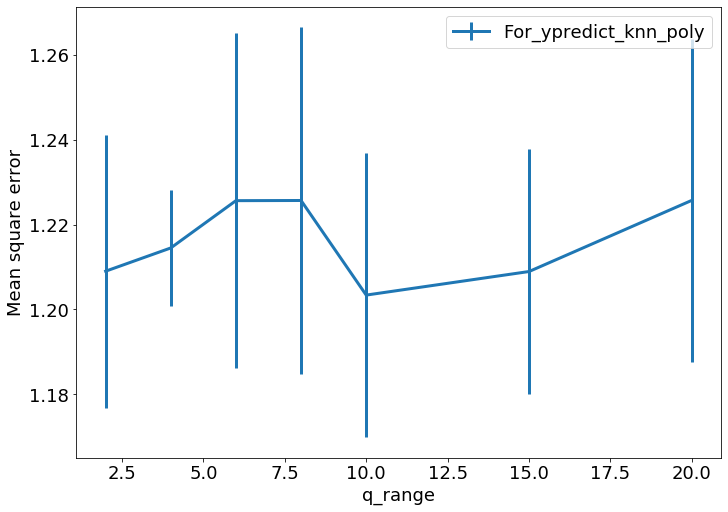

In [226]:
#testing for polynomial features:

kf = KFold(n_splits=5)
mean_error_poly_knn=[]; std_error_poly_knn=[];
q_range = [2,4,6,8,10,15,20]
for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly_knn = PolynomialFeatures(q).fit_transform(X)
    model_poly_knn= KNeighborsClassifier(n_neighbors=20,weights='uniform')
    temp_poly_knn=[]; 
    for train, test in kf.split(Xpoly_knn):
        model_poly_knn.fit(Xpoly_knn[train], y[train])
        ypred_poly_knn = model_poly_knn.predict(Xpoly_knn[test])
        temp_poly_knn.append(mean_squared_error(y[test],ypred_poly_knn))
    mean_error_poly_knn.append(np.array(temp_poly_knn).mean())
    std_error_poly_knn.append(np.array(temp_poly_knn).std())
#plotting the error bar
plt.errorbar(q_range,mean_error_poly_knn,yerr=std_error_poly_knn,linewidth=3)
plt.legend(["For_ypredict_knn_poly"])
plt.xlabel('q_range')
plt.ylabel('Mean square error')
plt.show()

0.7158774373259053


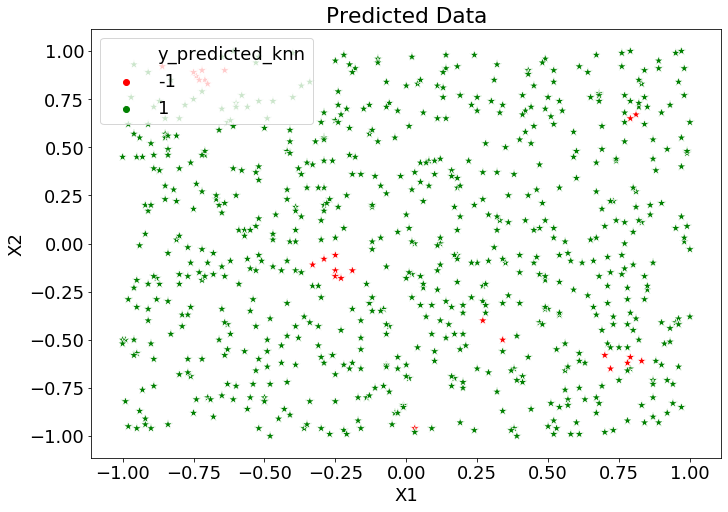

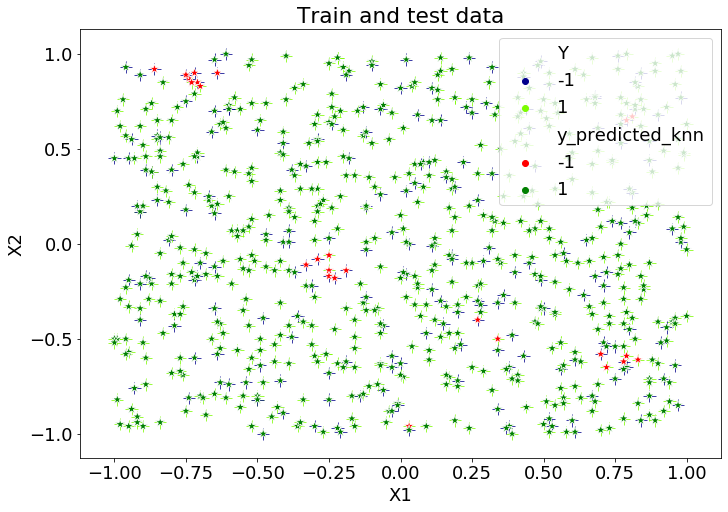

In [237]:
#trainning and predicting knn classifier for optimal solution
#Implementing Knn model
from sklearn.preprocessing import PolynomialFeatures
Xpoly_10 = PolynomialFeatures(4).fit_transform(X)
model_knn_true = KNeighborsClassifier(n_neighbors=20,weights='uniform') 
model_knn_true.fit(Xpoly_10, y)
ypred_knn_true = model_knn_true.predict(Xpoly_10)
print(model_knn_true.score(Xpoly_10, y))
y_scores = model_knn_true.predict_proba(Xpoly_10)
df['y_predicted_knn']=ypred_knn_true
#plot the graph predicted y for logistic regression.
sbn.scatterplot(x='X1',y='X2', hue='y_predicted_knn',palette=['r','g'],marker='*',s=100, data=df)
plt.title('Predicted Data')
plt.show()
#both y and y predicted.
sbn.scatterplot(x='X1',y='X2', hue='Y', s=150, palette =['darkblue','lawngreen'], marker='+', data=df)
sbn.scatterplot(x='X1',y='X2', hue='y_predicted_knn',palette=['r','g'],marker='*',s=100, data=df)
plt.title('Train and test data')
plt.show()


In [228]:
#Confusion matrics for linear, Knn and baseline predictor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xpoly_6,y,test_size=0.2)
model_logistic_conf=LogisticRegression(C=4, solver='lbfgs')
model_logistic_conf.fit(X_train,y_train)
ypred_logistic_conf=model_logistic_conf.predict(X_test)
print(model_logistic_conf.score(X_train, y_train))
cmtx_logistic = pd.DataFrame(
    confusion_matrix(y_test, ypred_logistic_conf), 
    index=['true:yes', 'true:no'], 
    columns=['pred:yes', 'pred:no']
)
print (cmtx_logistic)
print(classification_report(y_test, ypred_logistic_conf))

0.7160278745644599
          pred:yes  pred:no
true:yes         0       41
true:no          1      102
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        41
           1       0.71      0.99      0.83       103

    accuracy                           0.71       144
   macro avg       0.36      0.50      0.41       144
weighted avg       0.51      0.71      0.59       144



In [229]:
#For knn model
X_train,X_test,y_train,y_test = train_test_split(Xpoly_10,y,test_size=0.05,shuffle=False,stratify=None)
model_knn_conf=KNeighborsClassifier(n_neighbors=20,weights='uniform')
model_knn_conf.fit(X_train,y_train)
ypred_knn_conf=model_knn_conf.predict(X_test)
print(model_knn_conf.score(Xpoly_10, y))
cmtx_knn = pd.DataFrame(
    confusion_matrix(y_test, ypred_knn_conf), 
    index=['true:yes', 'true:no'], 
    columns=['pred:yes', 'pred:no']
)
print (cmtx_knn)
print(classification_report(y_test, ypred_knn_conf))


0.7103064066852368
          pred:yes  pred:no
true:yes         1       10
true:no          1       24
              precision    recall  f1-score   support

          -1       0.50      0.09      0.15        11
           1       0.71      0.96      0.81        25

    accuracy                           0.69        36
   macro avg       0.60      0.53      0.48        36
weighted avg       0.64      0.69      0.61        36



In [230]:
#for Dummy classifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.09,shuffle=False,stratify=None)
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
ydummy = dummy.predict(X_test)
print(dummy.score(X_train, y_train))
print(confusion_matrix(y_test, ydummy))
print(classification_report(y_test, ydummy))

0.7120980091883614
[[ 0 21]
 [ 0 44]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        21
           1       0.68      1.00      0.81        44

    accuracy                           0.68        65
   macro avg       0.34      0.50      0.40        65
weighted avg       0.46      0.68      0.55        65



C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


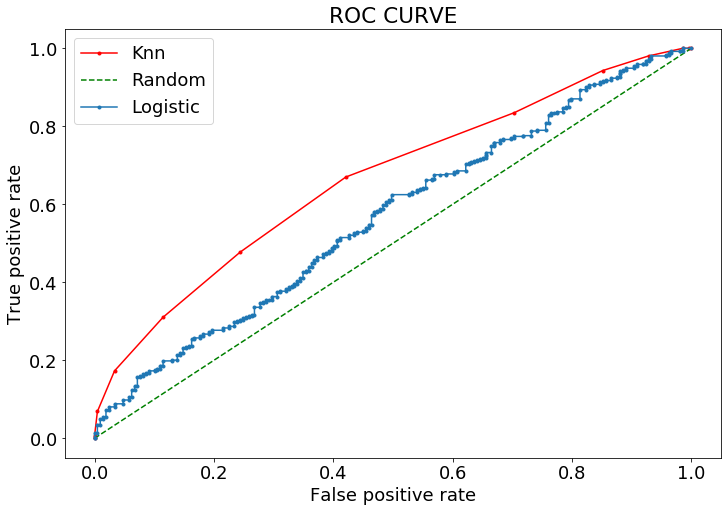

AUC of logistic: 0.505
AUC Knn model: 0.526


In [238]:
#Implementing ROC curve
from sklearn.metrics import roc_curve
fpr1, tpr1, threshold = roc_curve(y, y_scores[:, 1])
plt.plot(fpr1, tpr1, marker='.',color='red', label='Knn')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random',color ='green')
fpr, tpr, _ = roc_curve(y,model_true.decision_function(Xpoly_6))
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.legend()
plt.title('ROC CURVE')
plt.show()
#Auc value
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y,ypred_true )
print('AUC of logistic: %.3f' % auc)
auc = roc_auc_score(y,ypred_knn_true)
print('AUC Knn model: %.3f' % auc)